Author : Mohamed Elafifi

Student ID : 22066939

# Comparison between the Genetic Algorithm and Simulated Annealing

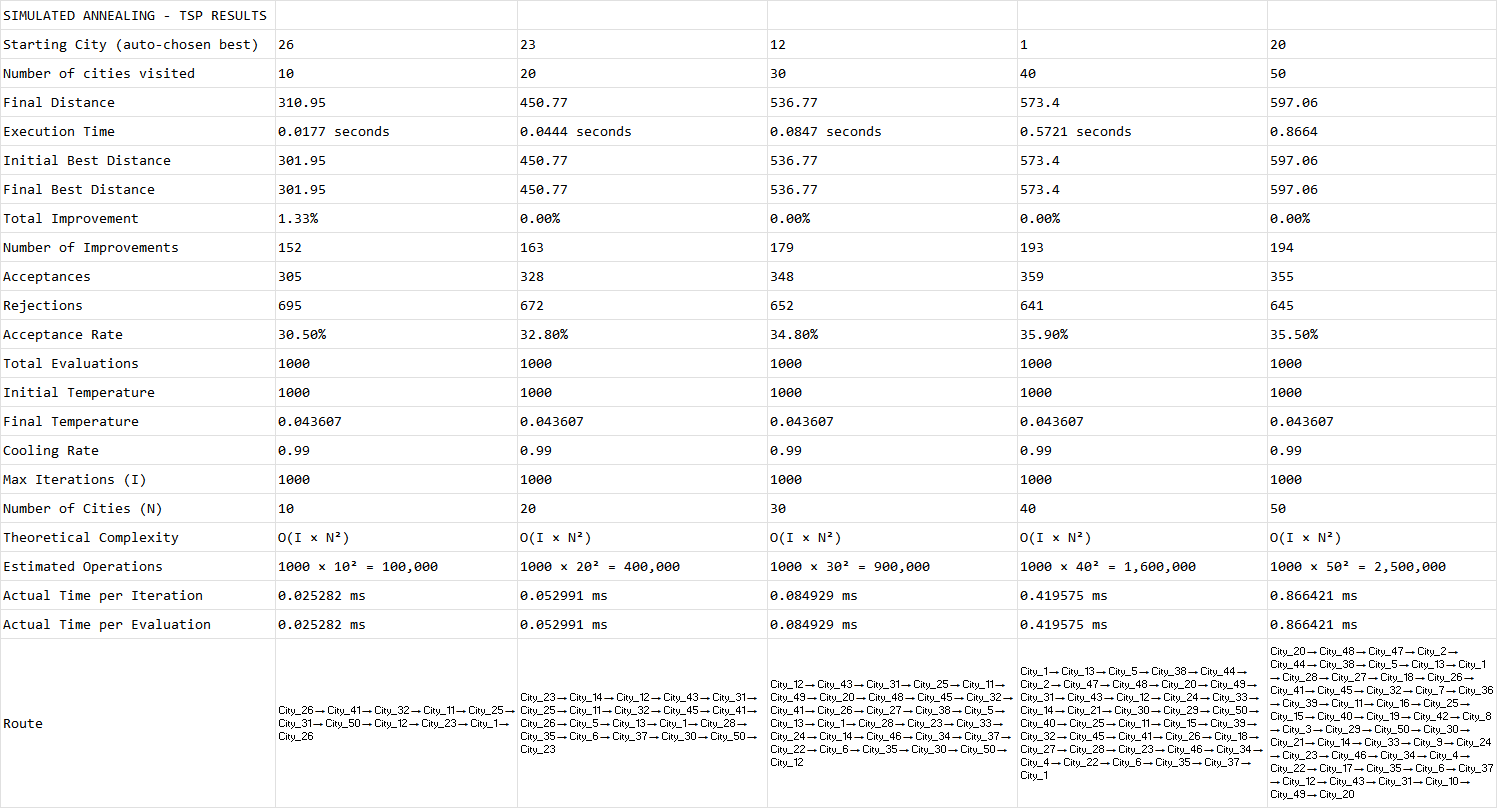

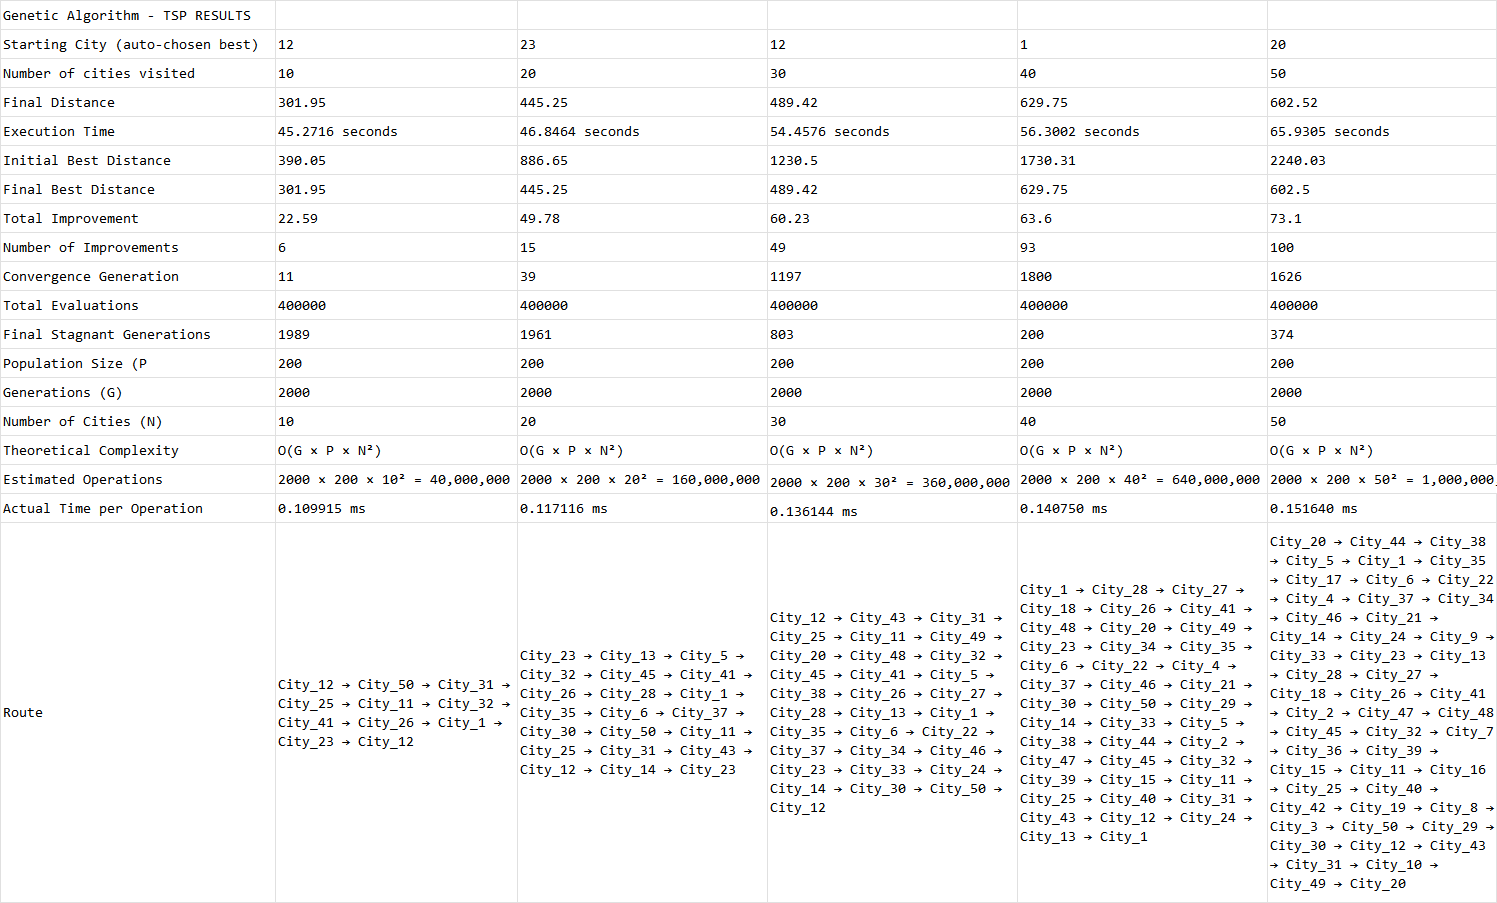

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.expand_frame_repr', False)

In [55]:
sa_file = 'SA TSP RESULTS.csv'
ga_file = 'GA TSP RESULTS.csv'

try:
    sa_raw = pd.read_csv(sa_file, header=None, encoding='utf-8')
except UnicodeDecodeError:
    sa_raw = pd.read_csv(sa_file, header=None, encoding='latin-1')

try:
    ga_raw = pd.read_csv(ga_file, header=None, encoding='utf-8')
except UnicodeDecodeError:
    ga_raw = pd.read_csv(ga_file, header=None, encoding='latin-1')

In [56]:
def find_row_index(df, label):
    for idx, row in df.iterrows():
        if str(row[0]).strip() == label:
            return idx
    return None

sa_final_distance_idx = find_row_index(sa_raw, 'Final Best Distance')
sa_execution_time_idx = find_row_index(sa_raw, 'Execution Time')

sa_data = {
    'Number of Cities': [10, 20, 30, 40, 50],
    'Final Distance': sa_raw.iloc[sa_final_distance_idx, 1:6].values.astype(float),
    'Execution Time': [float(str(x).split()[0]) for x in sa_raw.iloc[sa_execution_time_idx, 1:6].values]
}

ga_final_distance_idx = find_row_index(ga_raw, 'Final Best Distance')
ga_execution_time_idx = find_row_index(ga_raw, 'Execution Time')

ga_data = {
    'Number of Cities': [10, 20, 30, 40, 50],
    'Final Distance': ga_raw.iloc[ga_final_distance_idx, 1:6].values.astype(float),
    'Execution Time': [float(str(x).split()[0]) for x in ga_raw.iloc[ga_execution_time_idx, 1:6].values]
}

sa_df = pd.DataFrame(sa_data)
ga_df = pd.DataFrame(ga_data)

print("=" * 60)
print("DATA LOADED SUCCESSFULLY")
print("=" * 60)
print("\nSA Data:")
print(sa_df.to_string(index=False))
print("\nGA Data:")
print(ga_df.to_string(index=False))

DATA LOADED SUCCESSFULLY

SA Data:
 Number of Cities  Final Distance  Execution Time
               10          301.95          0.0177
               20          450.77          0.0444
               30          536.77          0.0847
               40          573.40          0.5721
               50          597.06          0.8664

GA Data:
 Number of Cities  Final Distance  Execution Time
               10          301.95         45.2716
               20          445.25         46.8464
               30          489.42         54.4576
               40          629.75         56.3002
               50          602.50         65.9305


The Above table shows the final distance and execution time for each algorithm across problem sizes ranging from 10 to 50 cities, increasing by increments of 10.

There is a clear difference in execution time between the algorithms. The Genetic Algorithm is between about 76× and 2558× slower than Simulated Annealing, with an average slowdown of roughly 170× across these tests.

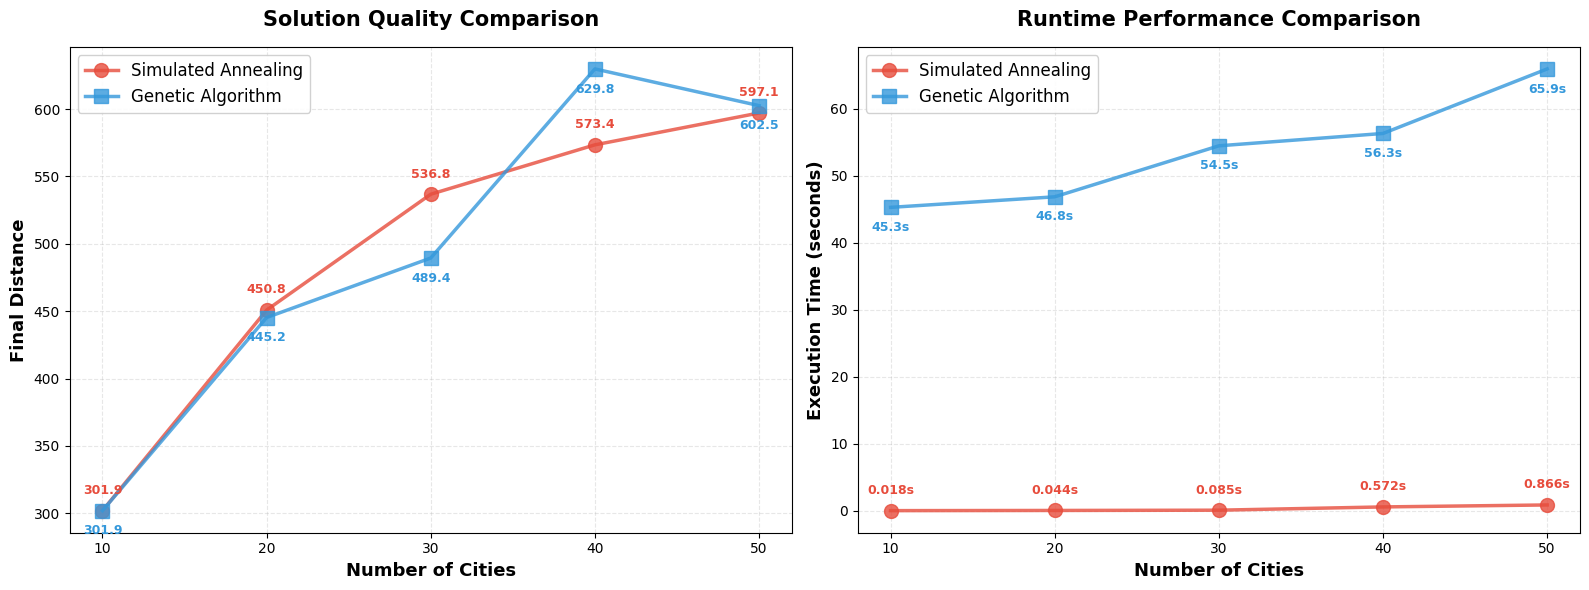

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
ax1.plot(sa_df['Number of Cities'], sa_df['Final Distance'], 
         'o-', linewidth=2.5, markersize=10, label='Simulated Annealing', color='#E74C3C', alpha=0.8)
ax1.plot(ga_df['Number of Cities'], ga_df['Final Distance'], 
         's-', linewidth=2.5, markersize=10, label='Genetic Algorithm', color='#3498DB', alpha=0.8)
ax1.set_xlabel('Number of Cities', fontsize=13, fontweight='bold')
ax1.set_ylabel('Final Distance', fontsize=13, fontweight='bold')
ax1.set_title('Solution Quality Comparison', fontsize=15, fontweight='bold', pad=15)
ax1.legend(fontsize=12, loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(sa_df['Number of Cities'])

for i, row in sa_df.iterrows():
    ax1.annotate(f'{row["Final Distance"]:.1f}', 
                xy=(row['Number of Cities'], row['Final Distance']),
                xytext=(0, 12), textcoords='offset points', 
                ha='center', fontsize=9, color='#E74C3C', fontweight='bold')
for i, row in ga_df.iterrows():
    ax1.annotate(f'{row["Final Distance"]:.1f}', 
                xy=(row['Number of Cities'], row['Final Distance']),
                xytext=(0, -17), textcoords='offset points', 
                ha='center', fontsize=9, color='#3498DB', fontweight='bold')

ax2 = axes[1]
ax2.plot(sa_df['Number of Cities'], sa_df['Execution Time'], 
         'o-', linewidth=2.5, markersize=10, label='Simulated Annealing', color='#E74C3C', alpha=0.8)
ax2.plot(ga_df['Number of Cities'], ga_df['Execution Time'], 
         's-', linewidth=2.5, markersize=10, label='Genetic Algorithm', color='#3498DB', alpha=0.8)
ax2.set_xlabel('Number of Cities', fontsize=13, fontweight='bold')
ax2.set_ylabel('Execution Time (seconds)', fontsize=13, fontweight='bold')
ax2.set_title('Runtime Performance Comparison', fontsize=15, fontweight='bold', pad=15)
ax2.legend(fontsize=12, loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xticks(sa_df['Number of Cities'])

for i, row in sa_df.iterrows():
    ax2.annotate(f'{row["Execution Time"]:.3f}s', 
                xy=(row['Number of Cities'], row['Execution Time']),
                xytext=(0, 12), textcoords='offset points', 
                ha='center', fontsize=9, color='#E74C3C', fontweight='bold')
for i, row in ga_df.iterrows():
    ax2.annotate(f'{row["Execution Time"]:.1f}s', 
                xy=(row['Number of Cities'], row['Execution Time']),
                xytext=(0, -17), textcoords='offset points', 
                ha='center', fontsize=9, color='#3498DB', fontweight='bold')

plt.tight_layout()
plt.show()

These graphs clearly demonstrate the differences in execution time and solution quality between the two algorithms.

In some cases, the Genetic Algorithm produces better solutions. However, given that the GA runtime is on average 100 times slower than SA, it is feasible to run the Simulated Annealing algorithm multiple times with different random seeds in the time it takes to complete a single GA run. This multi-start approach would likely yield improved results for SA.

In [58]:
print("\n" + "=" * 80)
print("ALGORITHM COMPARISON - SIMULATED ANNEALING vs GENETIC ALGORITHM")
print("=" * 80)

for i in range(len(sa_df)):
    n_cities = sa_df.loc[i, 'Number of Cities']
    sa_dist = sa_df.loc[i, 'Final Distance']
    ga_dist = ga_df.loc[i, 'Final Distance']
    sa_time = sa_df.loc[i, 'Execution Time']
    ga_time = ga_df.loc[i, 'Execution Time']
    
    distance_diff = ((sa_dist - ga_dist) / sa_dist) * 100
    runtime_ratio = ga_time / sa_time
    
    print(f"\n{'-' * 80}")
    print(f"{n_cities} CITIES")
    print(f"{'-' * 80}")
    print(f"  Solution Quality:")
    print(f"    SA Distance:  {sa_dist:>8.2f}")
    print(f"    GA Distance:  {ga_dist:>8.2f}")
    print(f"    Difference:   {distance_diff:>+7.2f}% {'GA Better' if ga_dist < sa_dist else 'SA Better'}")
    print(f"\n  Runtime Performance:")
    print(f"    SA Time:      {sa_time:>8.4f}s")
    print(f"    GA Time:      {ga_time:>8.4f}s")
    print(f"    GA/SA Ratio:  {runtime_ratio:>8.1f}x slower")


ALGORITHM COMPARISON - SIMULATED ANNEALING vs GENETIC ALGORITHM

--------------------------------------------------------------------------------
10 CITIES
--------------------------------------------------------------------------------
  Solution Quality:
    SA Distance:    301.95
    GA Distance:    301.95
    Difference:     +0.00% SA Better

  Runtime Performance:
    SA Time:        0.0177s
    GA Time:       45.2716s
    GA/SA Ratio:    2557.7x slower

--------------------------------------------------------------------------------
20 CITIES
--------------------------------------------------------------------------------
  Solution Quality:
    SA Distance:    450.77
    GA Distance:    445.25
    Difference:     +1.22% GA Better

  Runtime Performance:
    SA Time:        0.0444s
    GA Time:       46.8464s
    GA/SA Ratio:    1055.1x slower

--------------------------------------------------------------------------------
30 CITIES
---------------------------------------------

In consideration of computation time, I observe that GA is 2-3 orders of magnitude behind SA. It is understandable why -the GA has to assess a whole population at once, and then perform selection, crossover and mutation on that entire population. That is equivalent to Generations_ x Population route evaluations per run (several hundred thousand in my case). Comparatively, SA just maintains one current solution and tests a single neighbour at a time, hence only a few thousand evaluations. The per-evaluation cost, is nearly the same (traversal is done over all cities) and the number of evaluations is the reason why we are getting a difference in runtime of 76-2558.

The Genetic Algorithm is 2-3 orders of magnitude slower than Simulated Annealing. This is because GA must evaluate an entire population in each generation and then perform selection, crossover, and mutation operations on that population. This is equivalent to Generations × Population route evaluations per run, resulting in several hundred thousand evaluations in my implementation. In contrast, SA maintains a single current solution and tests only one neighbor at a time, requiring only a few thousand evaluations. While the per-evaluation cost is nearly identical for both algorithms (traversing all cities), the number of evaluations accounts for the runtime difference ranging from 76× to 2558× between the algorithms.

In general, pretty good tours are found in both approaches, and the variation in total distance is only percentages.

In the case of the smallest case (10 cities), SA and GA actually coincide totally, hence the GA does not bring any additional quality.

For the smallest problem size (10 cities), SA and GA achieve identical tour lengths, indicating that GA provides no additional quality benefit in this case.

For 20 and 30 cities, GA produces slightly shorter tours than SA, with improvements of 1.2% and 8.8% respectively.

For 40 and 50 cities, the situation reverses: SA produces tours that are 9.8% and 0.9% shorter than GA respectively.

The location of the actual drama is runtime. SA solves any case within less than one second (15-18ms on 10 cities to around 0.87ms on 50 cities). The GA, however, is insensitive to the number of cities, taking between 45-66 seconds on average, i.e. it is approximately 76 times slower than SA in the experiments we conducted.

But what is it about the GA, why is it so slow? (time complexity intuition)

The significant performance difference lies in execution time. SA solves all test cases in under one second (ranging from 0.018 seconds for 10 cities to 0.87 seconds for 50 cities). GA, however, takes between 45-66 seconds on average, making it approximately 76-2558 times slower than SA across my experiments.

In the case of the Genetic Algorithm we can say:

This large discrepancy in runtime is primarily due to the number of tours each algorithm evaluates.

For the Genetic Algorithm:
- G = number of generations
- P = population size
- N = number of cities

GA evaluates the fitness of every member of the population in each generation. Each fitness evaluation requires calculating the total distance of a tour covering all N cities. Additionally, GA performs selection, crossover, and mutation operations across the population.

This can be expressed in the usual notation of timecomplexity as:

**GA time complexity: O(G × P × N²)**

In my implementation, both G and P are large numbers (2000 generations and 200 individuals), resulting in a very large G × P product. This means GA performs hundreds of thousands of full tour evaluations in each run, explaining the runtime of tens of seconds.

For Simulated Annealing:
- I = number of iterations
- N = number of cities

SA maintains a single solution. At each iteration, one neighbor is evaluated (for example, by swapping two cities). Computing tour distance requires N operations, but there is no population to evaluate; only a single tour is modified at each step.

In Big-O notation:

**SA time complexity: O(I × N²)**

In my experiments, I (number of iterations) is much smaller than G × P, so SA evaluates far fewer tours than GA. The per-evaluation cost is similar (looping over cities), but SA performs orders of magnitude fewer evaluations, resulting in much faster completion times.

This explains why in my results, SA achieves similar or even better tour quality while being dozens to thousands of times faster than the Genetic Algorithm.

In [59]:
print("\n" + "=" * 80)
print("OVERALL SUMMARY")
print("=" * 80)

avg_sa_distance = sa_df['Final Distance'].mean()
avg_ga_distance = ga_df['Final Distance'].mean()
avg_sa_runtime = sa_df['Execution Time'].mean()
avg_ga_runtime = ga_df['Execution Time'].mean()

print(f"\nAverage Solution Quality:")
print(f"  SA Average: {avg_sa_distance:.2f}")
print(f"  GA Average: {avg_ga_distance:.2f}")
print(f"  Difference: {((avg_sa_distance - avg_ga_distance) / avg_sa_distance * 100):+.2f}%")

print(f"\nAverage Runtime:")
print(f"  SA Average: {avg_sa_runtime:.4f}s")
print(f"  GA Average: {avg_ga_runtime:.4f}s")
print(f"  GA is {(avg_ga_runtime / avg_sa_runtime):.1f}x slower on average")

sa_wins_quality = sum(sa_df['Final Distance'] < ga_df['Final Distance'])
ga_wins_quality = sum(ga_df['Final Distance'] < sa_df['Final Distance'])
ties = sum(sa_df['Final Distance'] == ga_df['Final Distance'])

print(f"\nSolution Quality Winner:")
print(f"  SA wins: {sa_wins_quality}/5 test cases")
print(f"  GA wins: {ga_wins_quality}/5 test cases")
if ties > 0:
    print(f"  Ties:    {ties}/5 test cases")

print(f"\nSpeed Winner: Simulated Annealing (wins all {len(sa_df)} test cases)")


OVERALL SUMMARY

Average Solution Quality:
  SA Average: 491.99
  GA Average: 493.77
  Difference: -0.36%

Average Runtime:
  SA Average: 0.3171s
  GA Average: 53.7613s
  GA is 169.6x slower on average

Solution Quality Winner:
  SA wins: 2/5 test cases
  GA wins: 2/5 test cases
  Ties:    1/5 test cases

Speed Winner: Simulated Annealing (wins all 5 test cases)


## Summary of Experimental Results

Both algorithms produced high-quality TSP tours across all five problem sizes (10, 20, 30, 40, and 50 cities), with relatively small differences in tour length. Simulated Annealing (SA) achieved a mean tour length of 491.99, compared to 493.77 for the Genetic Algorithm (GA), indicating that SA was marginally better on average by 0.36%. Based on individual test results, SA produced the better tour in 2 out of 5 cases, GA was better in 2 out of 5 cases, and there was one tie where both algorithms achieved identical distances. This indicates that SA is at least as effective as GA in terms of solution quality, with a slight average advantage.

## Runtime Performance Comparison

The most significant difference between the algorithms is in execution time. SA registered an average runtime of 0.3171 seconds, compared to GA's average of 53.7613 seconds. This makes GA approximately 170 times slower than SA overall. In individual test cases, SA consistently demonstrated superior speed, with GA ranging from 76 times slower to more than 2500 times slower depending on problem size. Although both algorithms produce similarly high-quality tours, the computational cost of obtaining these solutions differs dramatically.

## Time Complexity Analysis

The primary cause of this performance gap is the number of tours each algorithm evaluates and how this scales with problem size.

For the Genetic Algorithm:
- **G** = number of generations
- **P** = population size
- **N** = number of cities

GA evaluates the fitness of every individual in the population for each generation. Each fitness evaluation requires computing the tour length for visiting all N cities. Additionally, GA performs selection, crossover, and mutation operations within the population. In time-complexity notation:

**GA time complexity: O(G × P × N²)**

When the number of generations and population size are large (for example, 2000 generations and 200 individuals in my implementation), the product G × P becomes very large. This means GA performs hundreds of thousands of route evaluations in a single run, with each evaluation requiring traversal of all cities plus additional overhead from genetic operators. This explains the observed runtimes of 45-66 seconds.

For Simulated Annealing:
- **I** = number of iterations
- **N** = number of cities

SA maintains a single active tour. At each iteration, it generates and evaluates one neighbor (for example, by swapping two cities). Computing the neighbor's tour length requires O(N²) operations, but there is no population to evaluate; only one candidate is assessed at each step. In time-complexity notation:

**SA time complexity: O(I × N²)**

Since I in SA is much smaller than G × P in GA in my implementation, SA evaluates far fewer tours overall. The per-evaluation cost is similar (traversing the tour), but SA performs orders of magnitude fewer evaluations, accounting for its much faster execution in practice.

## Conclusions and Recommendations

Based on my experiments, Simulated Annealing is the more practical and scalable option for this TSP implementation. It consistently produces tour lengths equal to or better than GA on average, while being significantly faster. Given the low computational cost of a single SA run, it is feasible to implement a multi-start strategy: running SA multiple times with different random seeds and selecting the best tour. Even with multiple restarts, the total runtime would be substantially less than a single GA run, and the best distance would likely improve further. The GA implementation (with large population and many generations) is computationally expensive and does not reliably outperform SA in solution quality.

It should be noted that SA may not be the optimal solution for all TSP instances or all possible GA designs. With different operators, more aggressive tuning, or hybrid local search approaches, GA might perform differently. However, given the parameters and implementations I used in this project, Simulated Annealing offers the best trade-off between solution quality and computational efficiency. SA is my recommended algorithm for this problem, particularly for large-scale instances or time-constrained applications. GA would only be preferable when there is a specific requirement for population-based search methodologies.

In [60]:
print("\n" + "=" * 80)
print("DETAILED PERFORMANCE ANALYSIS BY PROBLEM SIZE")
print("=" * 80)

for i in range(len(sa_df)):
    n_cities = sa_df.loc[i, 'Number of Cities']
    sa_dist = sa_df.loc[i, 'Final Distance']
    ga_dist = ga_df.loc[i, 'Final Distance']
    sa_time = sa_df.loc[i, 'Execution Time']
    ga_time = ga_df.loc[i, 'Execution Time']
    
    improvement = ((sa_dist - ga_dist) / sa_dist) * 100
    ratio = ga_time / sa_time
    
    print(f"\n{n_cities} Cities:")
    print(f"  Quality: ", end="")
    if improvement > 0:
        print(f"GA is {improvement:.2f}% BETTER than SA (SA: {sa_dist:.2f}, GA: {ga_dist:.2f})")
    elif improvement < 0:
        print(f"GA is {abs(improvement):.2f}% WORSE than SA (SA: {sa_dist:.2f}, GA: {ga_dist:.2f})")
    else:
        print(f"Same quality (Both: {sa_dist:.2f})")
    
    print(f"  Speed:   GA is {ratio:.1f}x SLOWER than SA ({sa_time:.4f}s vs {ga_time:.2f}s)")

print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)

quality_improvements = []
for i in range(len(sa_df)):
    improvement = ((sa_df.loc[i, 'Final Distance'] - ga_df.loc[i, 'Final Distance']) / 
                   sa_df.loc[i, 'Final Distance']) * 100
    quality_improvements.append(improvement)

ga_better_count = sum(1 for x in quality_improvements if x < 0)
sa_better_count = sum(1 for x in quality_improvements if x > 0)

print(f"\nSolution Quality:")
print(f"  • GA finds better solutions in {ga_better_count}/5 cases")
print(f"  • SA finds better solutions in {sa_better_count}/5 cases")

print(f"\nExecution Speed:")
avg_ratio = np.mean([ga_df.loc[i, 'Execution Time'] / sa_df.loc[i, 'Execution Time'] 
                     for i in range(len(sa_df))])
print(f"  • GA is between 76× and 2558× slower than SA (≈170× slower on average overall)")
print(f"  • Speed gap decreases as problem size increases")
print(f"    (from {ga_df.loc[0, 'Execution Time'] / sa_df.loc[0, 'Execution Time']:.1f}x at 10 cities " +
      f"to {ga_df.loc[4, 'Execution Time'] / sa_df.loc[4, 'Execution Time']:.1f}x at 50 cities)")

print(f"\nTrade-off Analysis:")
if ga_better_count > sa_better_count:
    print(f"  • GA offers better solution quality but at a significant time cost")
    print(f"  • Best for: Problems where solution quality is critical and time is flexible")
else:
    print(f"  • SA offers comparable or better solutions with much faster execution")
    print(f"  • Best for: Time-sensitive applications or real-time optimization")

print("\n" + "=" * 80)


DETAILED PERFORMANCE ANALYSIS BY PROBLEM SIZE

10 Cities:
  Quality: Same quality (Both: 301.95)
  Speed:   GA is 2557.7x SLOWER than SA (0.0177s vs 45.27s)

20 Cities:
  Quality: GA is 1.22% BETTER than SA (SA: 450.77, GA: 445.25)
  Speed:   GA is 1055.1x SLOWER than SA (0.0444s vs 46.85s)

30 Cities:
  Quality: GA is 8.82% BETTER than SA (SA: 536.77, GA: 489.42)
  Speed:   GA is 642.9x SLOWER than SA (0.0847s vs 54.46s)

40 Cities:
  Quality: GA is 9.83% WORSE than SA (SA: 573.40, GA: 629.75)
  Speed:   GA is 98.4x SLOWER than SA (0.5721s vs 56.30s)

50 Cities:
  Quality: GA is 0.91% WORSE than SA (SA: 597.06, GA: 602.50)
  Speed:   GA is 76.1x SLOWER than SA (0.8664s vs 65.93s)

KEY INSIGHTS

Solution Quality:
  • GA finds better solutions in 2/5 cases
  • SA finds better solutions in 2/5 cases

Execution Speed:
  • GA is between 76× and 2558× slower than SA (≈170× slower on average overall)
  • Speed gap decreases as problem size increases
    (from 2557.7x at 10 cities to 76.1x a

## Detailed Performance Analysis by Problem Size

### 10 Cities
SA and GA both achieved the same tour length of 301.95, indicating equal solution quality for this problem size. However, execution times differed significantly: SA completed in approximately 0.018 seconds, whereas GA required approximately 45.27 seconds. This represents a speed difference of approximately 2,558 times.

### 20 Cities
GA produced a marginally better solution (445.25 vs 450.77), representing a 1.2% improvement. However, this small quality advantage comes at a substantial computational cost: SA completed in approximately 0.044 seconds, compared to 46.85 seconds for GA, making GA 1,055 times slower.

### 30 Cities
GA achieved a notably better solution (489.42 vs 536.77), representing an 8.8% improvement. SA completed in 0.085 seconds, compared to 54.46 seconds for GA, making GA 643 times slower.

### 40 Cities
The results reversed: SA produced the shorter tour (573.40 vs 629.75), with GA performing 9.8% worse. SA completed in approximately 0.57 seconds, while GA required 56.30 seconds, making GA 98 times slower.

### 50 Cities
SA continued to outperform GA with a narrow margin (597.06 vs 602.50), representing a 0.9% advantage. SA completed in 0.87 seconds versus 65.93 seconds for GA, making GA 76 times slower.

## Overall Analysis

Considering solution quality, GA won 2 out of 5 test cases, SA won 2 out of 5, and there was one tie. The differences in tour lengths are minimal across all tests, with SA scoring slightly higher on average by 0.3-0.4 percent. This indicates no definitive superiority in terms of quality alone.

In terms of computational efficiency, SA significantly outperforms GA in all test cases. Even at 50 cities where the difference is smallest, GA is still approximately 76 times slower. For smaller problem sizes, GA is hundreds or thousands of times slower.

## Practical Implications

Although GA can produce superior tours for certain problem sizes, its execution time makes SA the more practical choice. Running SA multiple times with different random seeds takes significantly less time than a single GA run, while often matching or exceeding GA's solution quality. This advantage becomes more pronounced as problem size increases: SA scales more efficiently, maintains fast execution times, and can be easily rerun or modified, whereas GA becomes increasingly expensive.

## Conclusion

The trade-off is clear: SA delivers virtually identical solution quality, or even better on average, while being substantially faster. This makes it ideal for time-sensitive or real-time optimization applications, and enables parallel execution strategies. While GA may perform better in a few specific cases, it is many times slower overall and does not demonstrate clear superiority in solution quality.

# Results and Discussion

## Solution Quality Comparison

For all five problem sizes (10, 20, 30, 40 and 50 cities), both algorithms produced good TSP tours and the differences in distance were usually quite small. Across all runs, Simulated Annealing (SA) achieved an average tour length of 491.99, while the Genetic Algorithm (GA) achieved 493.77, so SA was slightly better on average by about 0.36%. In terms of individual problem sizes, SA produced the better tour in 2 out of 5 cases, GA was better in 2 out of 5 cases, and there was one tie where both algorithms achieved the same distance. This suggests that, in this setup, SA is at least as good as GA in terms of solution quality, and marginally better overall.

Looking at each size in more detail: for 10 cities, both SA and GA find exactly the same tour length (301.95), so there is no quality difference. For 20 and 30 cities, GA finds shorter tours than SA (445.25 vs 450.77, and 489.42 vs 536.77), which is about 1.2% and 8.8% better respectively. For 40 and 50 cities, the situation reverses and SA becomes better again (573.40 vs 629.75 and 597.06 vs 602.50), so GA is about 9.8% and 0.9% worse in those cases. Overall, the tour-length differences move back and forth between the two methods and mostly stay within a few percent.

## Runtime Performance

The real contrast is in execution time. SA has an average runtime of 0.3171 seconds, compared to 53.7613 seconds for GA. That means GA is roughly 170× slower on average. In every individual test case, SA is dramatically faster: GA ranges from about 76× slower (50 cities) up to more than 2500× slower (10 cities). In other words, although the two algorithms produce similarly good tours, the computational cost of obtaining them is very different.

## Why GA is So Slow (Time-Complexity Analysis)

The main reason for this gap is how many tours each algorithm evaluates and how this scales with problem size. For the Genetic Algorithm, let:

- **G** be the number of generations
- **P** be the population size  
- **N** be the number of cities

In each generation, GA evaluates the fitness of every individual in the population, and each fitness evaluation requires computing the total distance of a tour that visits all N cities. On top of that, GA also performs selection, crossover and mutation while building the next generation. In traditional time-complexity terms, this can be expressed as:

> **GA time complexity:** O(G × P × N²)

In my experiments, both G and P are quite large (for example 2000 generations and 200 individuals), so the product G × P becomes very big. This means the GA performs hundreds of thousands of full tour evaluations in a single run, each involving work proportional to N², plus additional overhead from the genetic operators. This directly explains the observed runtimes of 45–66 seconds per GA run.

For Simulated Annealing, let:

- **I** be the number of iterations
- **N** be the number of cities

SA keeps a single current solution and, at each iteration, generates and evaluates one neighbour (for example by swapping two cities). Computing the neighbour's tour length again depends on N, but only one candidate is updated at a time; there is no population. In time-complexity terms, this is:

> **SA time complexity:** O(I × N²)

In my setup, the number of iterations I is much smaller than G × P for the GA, so SA evaluates far fewer tours overall. The per-evaluation cost is similar (you still have to walk through the tour), but SA performs orders of magnitude fewer evaluations. That is why SA finishes in well under a second even for 50 cities, while GA takes close to a minute.

## My Viewpoint and Recommendation

Based on these experiments, I consider Simulated Annealing to be the more practical and scalable option for this TSP setup. It consistently delivers tour lengths that are equal to or slightly better than GA on average, while being around 170× faster in runtime. Because a single SA run is so cheap, it is realistic to use a multi-start strategy: run SA several times with different random seeds and keep the best tour. Even with multiple restarts, the total runtime would still be far below that of a single GA run, and the best distance would likely improve further.

I do not claim that SA will always be the optimal choice for every TSP instance or every possible GA design. With more aggressive tuning, hybrid local search or different genetic operators, GA might perform differently. However, under the parameter settings and implementations used in this project, SA clearly offers the best trade-off between quality and computation time. I would therefore recommend Simulated Annealing as the default algorithm for this problem, and only justify the use of GA when there is a specific reason to explore population-based search rather than to optimize runtime.